In [3]:
from IPython.display import Image

# Overview of Built-In Sequences


- Container Sequences
  - Can hold items of different types, including nested containers. Some examples: list, tuple, and collections.deque.
- Flat Sequences
  - Can hold items of one type. Some examples: str, bytes, bytearray, memoryview, and array.array.
  - Because they can only hold one type, they are more compact in memory and faster to iterate over.


A container sequence stores items by keeping their addresses, while a flat sequence stores the actual items inside itself.


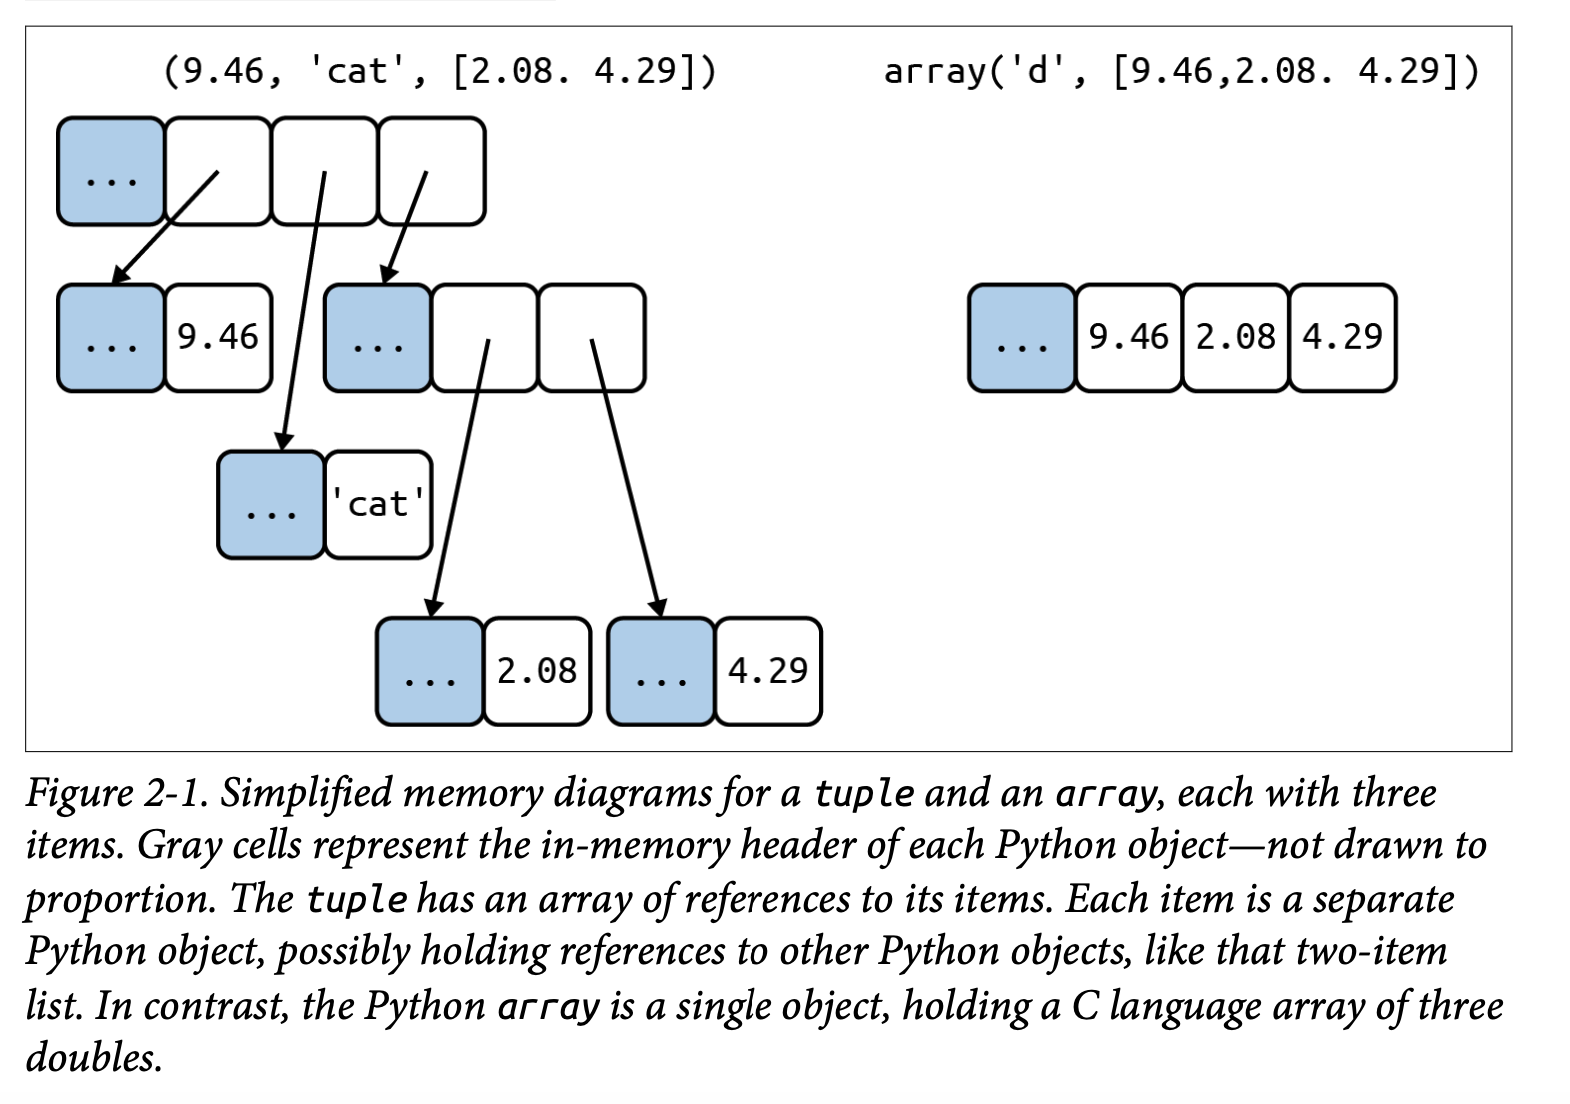

In [4]:
Image('/var/folders/5r/0f8bfrvn6_z4rmz0g0thdv900000gn/T/TemporaryItems/NSIRD_screencaptureui_5jIQpT/Screenshot 2025-02-23 at 22.37.48.png', 
      width=600, 
      height=400)

```{note}
Every Python object in memory has a head with meta data. For python object, a float, has a value field and two metadata fields:
- ob_refcnt: reference count
- ob_type: pointer to the object's type
- ob_fval: the actual float value

An array of floats is smaller than a tuple of floats because an array stores raw values directly, while a tuple stores separate float objects, each taking extra space.
```


Another way of grouping sequence types is by mutability:

- Mutable sequences: list, bytearray, array.array, collections.deque, and memoryview.
- Immutable sequences: tuple, str, and bytes.


In [5]:
from collections import abc 
print(issubclass(tuple, abc.Sequence))
print(issubclass(list, abc.MutableSequence))

True
True


We can see from below. MutuableSequence inherit all the methods from immutable sequence (which is sequence) and add some more methods to it.


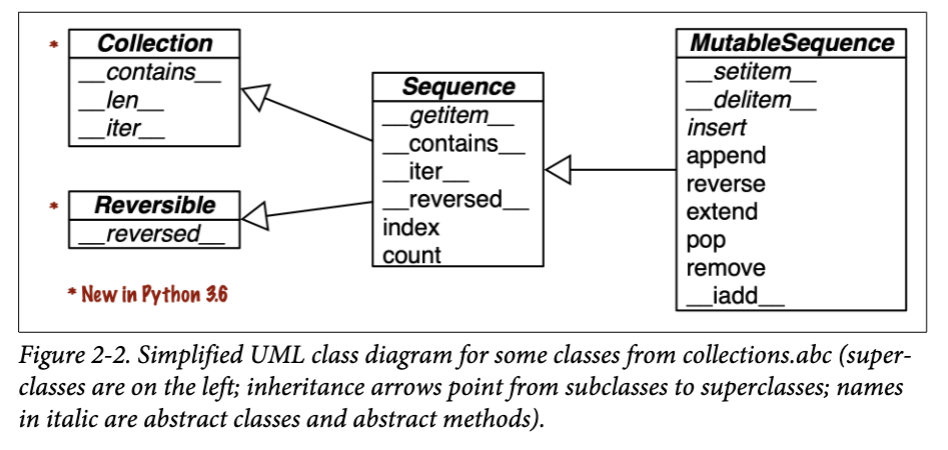

In [7]:
Image('/Users/jason/Files/Practice/fluent-python-notes/assets/Screenshot 2025-02-24 at 23.34.15.png',
      width=600, 
      height=400)

Example in [cpython/lib/\_collections_abc.py](https://github.com/python/cpython/blob/main/Lib/_collections_abc.py)

```{python}
class Sequence(Reversible, Collection):
    pass
```

We can see that the Sequence class is a subclass of Reversible and Collection. This means that all sequences must support the methods of these two classes.


```{tip}
Mutable vs Immutable AND container vs flat. They are helpful to extrapolate what you konw about one sequence type to others.
```


# Tuples are not just Immutable Lists


## Tuples as Records


Because tuple's items positions are fixed, it makes a good record. For example, a tuple to represent a city with name, year, and population.

```{python}
city = ('Tokyo', 2003, 32450, 0.66)
```


We often think of records as data structures with named fields, but the tuples are lightweight and require no extra memory to store field names. The tuple's values are like fields in a record.

Also, we can use tuple unpacking to assign the fields to variables.

```{python}
name, year, pop, change = city
```


```{note}
Iterable unpacking is a generalization of tuple unpacking. It works with any iterable object.
```


## Tuples as Immutable Lists


- Clarity:
  - when you see a tuple in code, you know it's immutable.
- Performance:

  - **Tuple vs List Literals:**  
    The Python compiler creates a tuple literal in a single operation with one tuple constant. In contrast, a list literal is built by pushing each element separately and then assembling the list.

  - **Copying Behavior:**  
    When you call `tuple(t)` on a tuple, it just returns the same tuple without copying. But calling `list(l)` on a list creates a new copy of that list.

  - **Memory Allocation:**  
    A tuple’s fixed size means it uses exactly the memory it needs. Lists, however, are allocated extra space to make appending new items more efficient.

  - **Storage of References:**  
    Tuples store their item references directly inside their structure. Lists, on the other hand, hold a pointer to an external array of references, and this extra level of indirection can lower CPU cache effectiveness.


```{caution}
Immutability of a tuple only affects the tuple itself, not the items inside it. If the items are mutable, they can change.

For example, if a tuple holds a list, the list can change in place. The tuple's immutability only prevents reassigning the variable holding the tuple.

To check if a tuple or any object has a fixed value, you can use hash()
t1 = (1, 2, [30, 40])
hash(t1)  # TypeError: unhashable type: 'list'

However, this could be a source of bugs, so it's better to avoid mutable items in tuples.
```


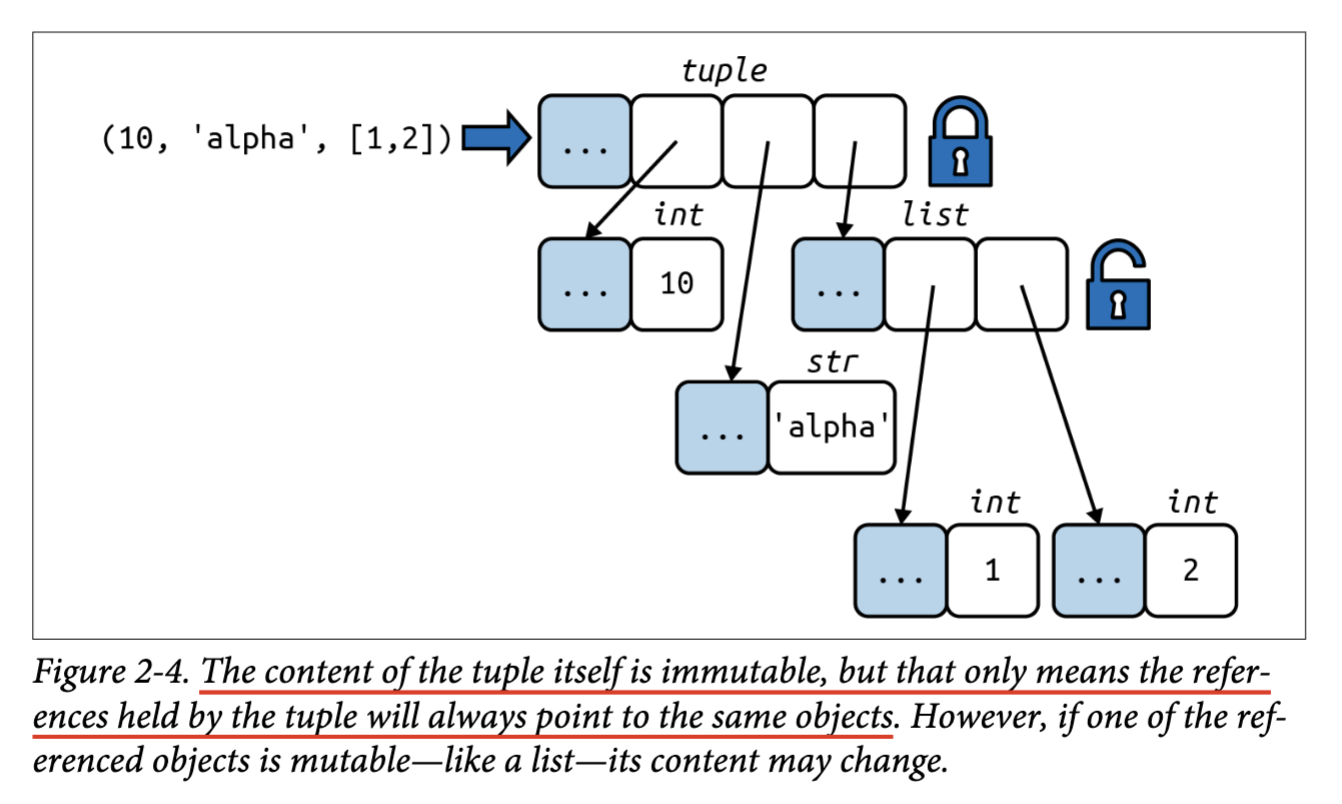

In [11]:
Image('/Users/jason/Files/Practice/fluent-python-notes/assets/Screenshot 2025-02-24 at 23.57.06.png',
      width=600,
      height=400)

## Comparing Tuple and List Methods


```{tip}
Tuples support all the read-only methods of lists except for __reversed__. This isn't an issue because you can still use the built-in reversed() function since it works on any iterable.
```


# Unpacking Sequences and Iterables


Benefits of unpacking:

- It avoids uncessary and error-prone indexing.
- It works with any iterable objects (iterable is an object that implements the **iter** method), including generators and iterators which don't support indexing.
- The only requirement is that the number of variables and the length of the iterable match. Either you use \* to capture excess items or you unpack nested iterables.


```{python}
# Unpacking a tuple
lax_coordinates = (33.9425, -118.408056)
latitude, longitude = lax_coordinates
```


An elegant way to swap variables:

```{python}
a, b = b, a
```


Another example of unpackign is prefixing an argument with \* when calling a function. This is called `argument unpacking`.

```{python}
t = (20, 8)
divmod(*t)  # (2, 4)
```


## Using \* to grab excess items


```{python}
a, b, *rest = range(5)
a, b, rest  # (0, 1, [2, 3, 4])

a, *rest, b = range(5)
a, b, *rest  # (0, 4, [1, 2, 3])

*head, a, b = range(5)
head, a, b  # ([0, 1, 2], 3, 4)
```

As you can see from the examples above, the \* operator can be used to grab excess items in the middle or at the end of a sequence.


## Unpacking with \* in Function Calls and Sequence Literals


```{python}
def fun(a,b,c, *args):
    print(a,b,c, args)

fun(1,2,3,4,5,6)  # 1 2 3 (4, 5, 6)
```

The \* operator can also be used in function calls to unpack arguments. This is useful when you want to pass a sequence to a function that takes multiple arguments.


The \* can also be used when defining a sequence literal. This is useful when you want to concatenate multiple sequences.

```{python}
a = [1,2,3]
b = [4,5,6]
c = [*a, *b]
c  # [1, 2, 3, 4, 5, 6]

(*range(4), 4)  # (0, 1, 2, 3, 4)
```


## Nested Unpacking


```{python}
metro_areas = [
    ('Tokyo', 'JP', 36.933, (35.689722, 139.691667)),
    ('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
    ('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
    ('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
    ('Sao Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
]

def main():
    print('{:15} | {:^9} | {:^9}'.format('', 'lat.', 'long.'))
    fmt = '{:15} | {:9.4f} | {:9.4f}'
    for name, cc, pop, (latitude, longitude) in metro_areas:
        if longitude <= 0:
            print(fmt.format(name, latitude, longitude))

# Output
main()
#                |   lat.    |   long.
# Tokyo          |   35.6897 |  139.6917
# Delhi NCR      |   28.6139 |   77.2089
# Mexico City    |   19.4333 |  -99.1333
# New York-Newark |  40.8086 |  -74.0204
# Sao Paulo      |  -23.5478 |  -46.6358
```

Function here is using nested unpacking to extract the latitude and longitude from the tuple. This is a good example of how unpacking can make code more readable.
